In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/MACSS60000/FINAL_DATA/sentiment_score_threshold_100.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,title,selftext,created_utc,score,all_comments,contains_relational_word,reply_count,pandemic_period,comment_body,group,sentiment_probabilities,predicted_rating,normalized_sentiment
0,0,0,Is my degree worth it?,"I know for a fact I want to be a teacher, pref...",2020-04-29 06:16:47,1.0,{'body': 'Welcome to /r/teaching. Please remem...,1.0,3.0,1.0,Welcome to /r/teaching. Please remember the ru...,0.0,"[0.02434772, 0.01911189, 0.05400144, 0.2829052...",5.0,0.727183
1,1,0,Is my degree worth it?,"I know for a fact I want to be a teacher, pref...",2020-04-29 06:16:47,1.0,"{'body': ""It depends on the licensing requirem...",1.0,3.0,1.0,It depends on the licensing requirements for y...,0.0,"[0.03279613, 0.21216513, 0.53603506, 0.1824882...",3.0,-0.011119
2,2,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,"{'body': 'Are you on a curriculum map?', 'scor...",0.0,10.0,0.0,Are you on a curriculum map?,0.0,"[0.18765633, 0.20995575, 0.26447347, 0.1931614...",3.0,-0.051301
3,3,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,{'body': 'I love this question and am interest...,0.0,10.0,0.0,I love this question and am interested in what...,0.0,"[0.00962509, 0.03723098, 0.11756698, 0.5209406...",4.0,0.546866
4,4,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,"{'body': ""So what they taught us in our progra...",0.0,10.0,0.0,So what they taught us in our program is that ...,0.0,"[0.03146419, 0.16652903, 0.48224553, 0.2634071...",3.0,0.073329


In [ ]:
df.shape

(1304575, 15)

In [ ]:
df = df.drop_duplicates(subset='comment_body', keep='first')
df.shape

(1245728, 15)

In [ ]:
df['created_utc'].iloc[0]

'2020-04-29 06:16:47'

In [ ]:
df['normalized_sentiment'].iloc[0]

0.7271826350000001

In [ ]:
import pandas as pd

df['created_utc'] = pd.to_datetime(df['created_utc'])
df['year_month'] = df['created_utc'].dt.to_period('M')
counts = df.groupby(['year_month', 'group']).size().reset_index(name='count')
print(counts[110:120])

    year_month  group  count
110    2022-08    0.0  17743
111    2022-08    1.0   6049
112    2022-09    0.0  17471
113    2022-09    1.0   6530
114    2022-10    0.0  21804
115    2022-10    1.0   6403
116    2022-11    0.0  15986
117    2022-11    1.0   5608
118    2022-12    0.0  17192
119    2022-12    1.0   6203


In [ ]:
num_scores_below_neg_one = df[df['normalized_sentiment'] < -1]['normalized_sentiment'].count()
num_scores_below_neg_one_alt = (df['normalized_sentiment'] < -1).sum()
print(f"Number of normalized_score values lower than -1: {num_scores_below_neg_one}")
print(f"Alternative method result: {num_scores_below_neg_one_alt}")

Number of normalized_score values lower than -1: 0
Alternative method result: 0


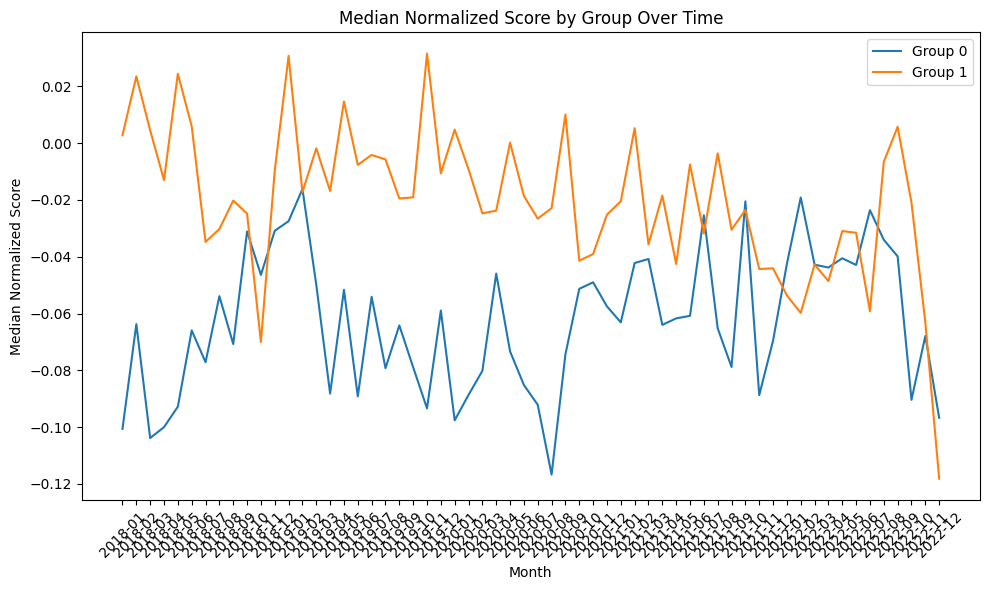

In [ ]:
import matplotlib.pyplot as plt

df['created_utc'] = pd.to_datetime(df['created_utc'])
df['year_month'] = df['created_utc'].dt.to_period('M')
grouped = df.groupby(['year_month', 'group'])['normalized_sentiment'].median().reset_index()
group_0 = grouped[grouped['group'] == 0]
group_1 = grouped[grouped['group'] == 1]
plt.figure(figsize=(10, 6))
plt.plot(group_0['year_month'].astype(str), group_0['normalized_sentiment'], label='Group 0')
plt.plot(group_1['year_month'].astype(str), group_1['normalized_sentiment'], label='Group 1')
plt.xlabel('Month')
plt.ylabel('Median Normalized Score')
plt.title('Median Normalized Score by Group Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-15-42a5eef64efe>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Use a visually appealing style
<ipython-input-15-42a5eef64efe>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_0['year_month_dt'] = group_0['year_month'].dt.to_timestamp()
<ipython-input-15-42a5eef64efe>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

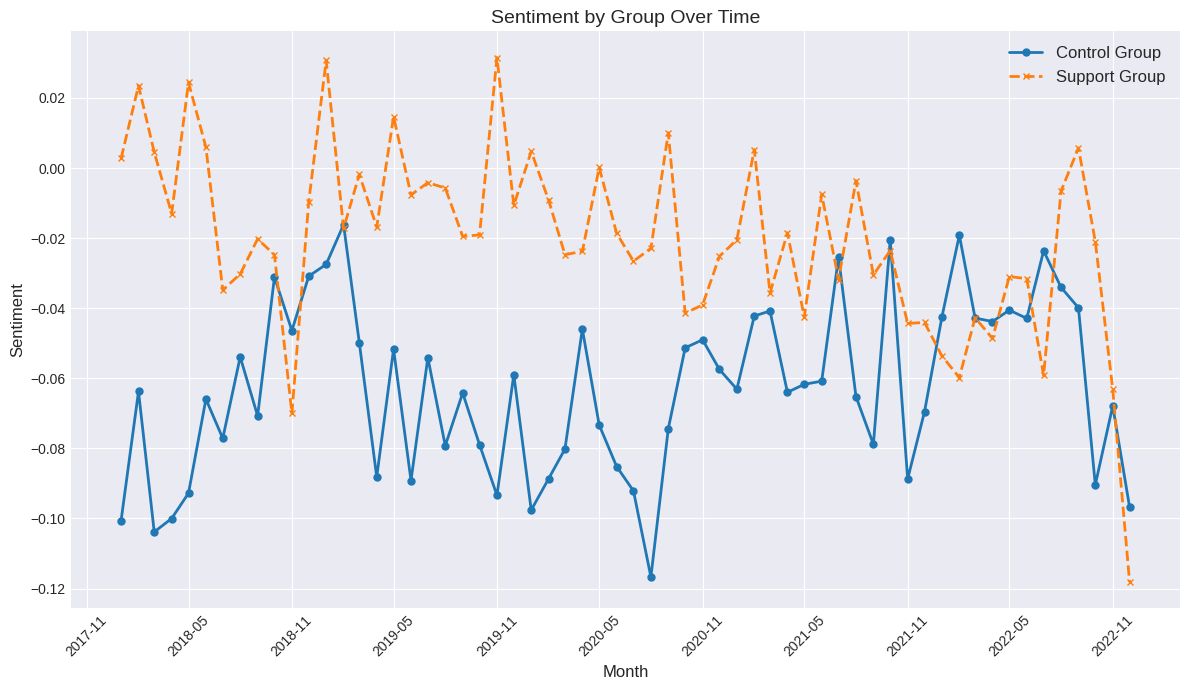

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('seaborn-darkgrid')
group_0['year_month_dt'] = group_0['year_month'].dt.to_timestamp()
group_1['year_month_dt'] = group_1['year_month'].dt.to_timestamp()

plt.figure(figsize=(12, 7))
plt.plot(group_0['year_month_dt'], group_0['normalized_sentiment'], label='Control Group', linewidth=2, marker='o', markersize=5)
plt.plot(group_1['year_month_dt'], group_1['normalized_sentiment'], label='Support Group', linewidth=2, linestyle='--', marker='x', markersize=5)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)
plt.title('Sentiment by Group Over Time', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

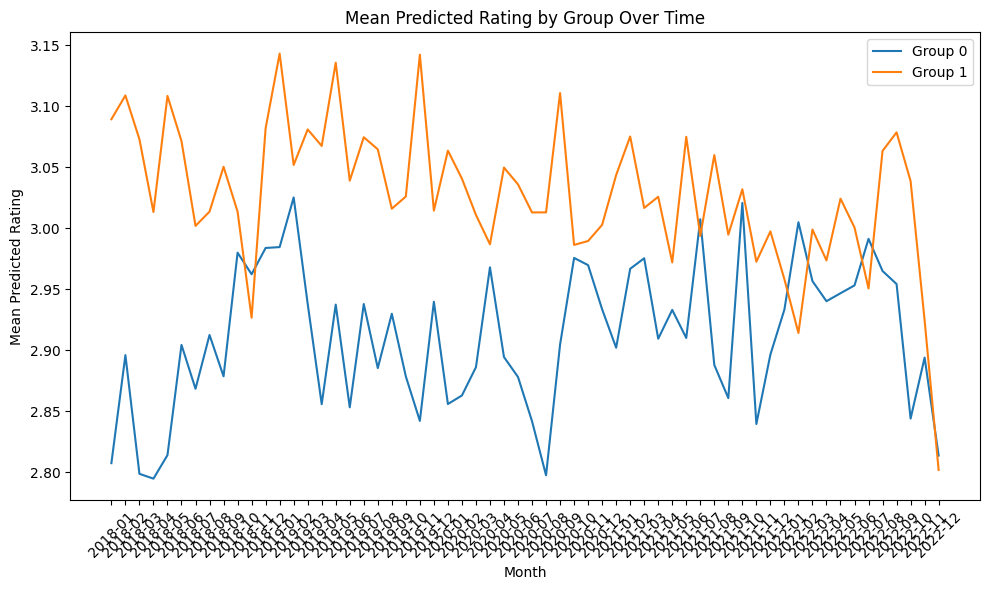

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['created_utc'] = pd.to_datetime(df['created_utc'])
df['year_month'] = df['created_utc'].dt.to_period('M')
grouped = df.groupby(['year_month', 'group'])['predicted_rating'].mean().reset_index()

group_0 = grouped[grouped['group'] == 0]
group_1 = grouped[grouped['group'] == 1]

plt.figure(figsize=(10, 6))
plt.plot(group_0['year_month'].astype(str), group_0['predicted_rating'], label='Group 0')
plt.plot(group_1['year_month'].astype(str), group_1['predicted_rating'], label='Group 1')

plt.xlabel('Month')
plt.ylabel('Mean Predicted Rating')
plt.title('Mean Predicted Rating by Group Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df['normalized_sentiment'].value_counts()

 0.581347    12803
 0.727183     5047
-0.420163     3501
-0.047129     3105
-0.028662     1746
             ...  
 0.102264        1
 0.132039        1
-0.539379        1
 0.582508        1
-0.241946        1
Name: normalized_sentiment, Length: 1239615, dtype: int64

In [ ]:
import numpy as np
rows_with_specific_value = df.loc[np.isclose(df['normalized_sentiment'], 0.581347, atol=1e-5)]

In [ ]:
rows_with_specific_value['sentiment_probabilities'].iloc[0]

'[0.01983479, 0.04234341, 0.11715366, 0.39660576, 0.42406234]'

In [ ]:
rows_with_specific_value['sentiment_probabilities'].iloc[1]

'[0.04934198, 0.04807147, 0.09961686, 0.29649478, 0.5064749]'

In [ ]:
rows_with_specific_value['sentiment_probabilities'].iloc[2]

'[0.04331978, 0.05712582, 0.09815699, 0.29632568, 0.5050717]'

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,title,selftext,created_utc,score,all_comments,contains_relational_word,reply_count,pandemic_period,comment_body,group,sentiment_probabilities,predicted_rating,normalized_sentiment,year_month
0,0,0,Is my degree worth it?,"I know for a fact I want to be a teacher, pref...",2020-04-29 06:16:47,1.0,{'body': 'Welcome to /r/teaching. Please remem...,1.0,3.0,1.0,Welcome to /r/teaching. Please remember the ru...,0.0,"[0.02434772, 0.01911189, 0.05400144, 0.2829052...",5.0,0.727183,2020-04
1,1,0,Is my degree worth it?,"I know for a fact I want to be a teacher, pref...",2020-04-29 06:16:47,1.0,"{'body': ""It depends on the licensing requirem...",1.0,3.0,1.0,It depends on the licensing requirements for y...,0.0,"[0.03279613, 0.21216513, 0.53603506, 0.1824882...",3.0,-0.011119,2020-04
2,2,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,"{'body': 'Are you on a curriculum map?', 'scor...",0.0,10.0,0.0,Are you on a curriculum map?,0.0,"[0.18765633, 0.20995575, 0.26447347, 0.1931614...",3.0,-0.051301,2018-06
3,3,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,{'body': 'I love this question and am interest...,0.0,10.0,0.0,I love this question and am interested in what...,0.0,"[0.00962509, 0.03723098, 0.11756698, 0.5209406...",4.0,0.546866,2018-06
4,4,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,"{'body': ""So what they taught us in our progra...",0.0,10.0,0.0,So what they taught us in our program is that ...,0.0,"[0.03146419, 0.16652903, 0.48224553, 0.2634071...",3.0,0.073329,2018-06


In [ ]:
for i in range(20):
    print(rows_with_specific_value['sentiment_probabilities'].iloc[i])
    print(rows_with_specific_value['comment_body'].iloc[i])

[0.01983479, 0.04234341, 0.11715366, 0.39660576, 0.42406234]
I was so fortunate that I was an Assistant at my school and I was able to still be paid while student teaching. That was a few years ago but I was go grateful my university had a good working relationship with the district I was at
[0.04934198, 0.04807147, 0.09961686, 0.29649478, 0.5064749]
I made my own posters etc by printing them at Walgreens photo center.  The school laminated them for me.
[0.04331978, 0.05712582, 0.09815699, 0.29632568, 0.5050717]
I think how you feel is being felt by so many people. You aren’t wrong. My friend declined a position as a superintendent because he said “it’s a no win situation “ but he didn’t give up. He said that he can help Teachers in a different way. He has a group on fb. You should follow.
[0.04505668, 0.0519062, 0.09000714, 0.32134426, 0.4916857]
Yes! I used to teach elementary in China and now Korea. I recommend Oxford’s magic key series. The books are graded by level, my kids in Chi

In [ ]:
a = rows_with_specific_value['comment_body'].iloc[20]
a

"Thank you for for sharing. A reminder: if you are seeking resources in your local area, please provide that in the post so that users can share appropriate links and phone numbers. *If you are in distress, please call 9-1-1* or your local emergency number. *You are not alone. Help is available.* If you are having suicidal thoughts, please [click here for a list of crisis support services.](http://www.suicide.org/international-suicide-hotlines.html), If you are seeking therapy online, please [click here for a list of counselling services.](https://thelifelinecanada.ca/pattern-interrupt/ecounselling/) *If you feel well enough to do so, please do your part to enrich this community.* Now that you have posted, please leave a constructive, helpful comment on someone else's post. Filter by new to find posts with zero comments. Together, we make this community great. Thank you for being here. \n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of thi

In [ ]:
df['comment_body'].value_counts()

Thank you for for sharing. A reminder: if you are seeking resources in your local area, please provide that in the post so that users can share appropriate links and phone numbers. *If you are in distress, please call 9-1-1* or your local emergency number. *You are not alone. Help is available.* If you are having suicidal thoughts, please [click here for a list of crisis support services.](http://www.suicide.org/international-suicide-hotlines.html), If you are seeking therapy online, please [click here for a list of counselling services.](https://thelifelinecanada.ca/pattern-interrupt/ecounselling/) *If you feel well enough to do so, please do your part to enrich this community.* Now that you have posted, please leave a constructive, helpful comment on someone else's post. Filter by new to find posts with zero comments. Together, we make this community great. Thank you for being here. \n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this

In [ ]:
df.shape

(1304575, 16)

In [ ]:
df = df.drop_duplicates(subset='comment_body', keep='first')

In [ ]:
df.shape

(1245728, 16)